In [1]:
file_path = "/home/chowder/Documents/AiLearning" + \
            "/codingChallenges/kaggle/competitions/gettingStarted" + \
            "/titanic/data/titanic/train.csv"

In [2]:
import pandas as pd
train_df = pd.read_csv(file_path)

/home/chowder/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [3]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
1 - train_df["Survived"].mean()

0.6161616161616161

In [5]:
train_df["Sex"].map(lambda x: int(x == "male")).mean()

0.6475869809203143

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# what percentage of the time was being labled female a correct indicator of surviving
fgender_survived = pd.Series(
    train_df[["Survived", "Sex"]].apply(
        (lambda x:
        int(int(x["Survived"]) == int(x["Sex"] == "female")) 
    ), axis=1)
)
fgender_survived.mean()

0.7867564534231201

In [8]:
mgender_survived = pd.Series(
    train_df[["Survived", "Sex"]].apply(
        (lambda x:
        int(int(x["Survived"]) == int(x["Sex"] == "male")) 
    ), axis=1)
)
mgender_survived.mean()

0.2132435465768799

In [9]:
mgender_survived.mean() + fgender_survived.mean()

1.0

In [10]:
# I want to make a proper confusion matrix for the gender classification
from sklearn.metrics import confusion_matrix
y_true = train_df["Survived"]
y_pred = [int(x == "female") for x in train_df["Sex"]]
confusion_matrix(y_true, y_pred)
# assigned gender being female seems to have worse negitive perdictive vale tha PPV

array([[468,  81],
       [109, 233]])

In [11]:
from sklearn.metrics.cluster import contingency_matrix
contingency_matrix(y_true, y_pred)

array([[468,  81],
       [109, 233]])

In [12]:
from sklearn.metrics.cluster import adjusted_mutual_info_score
adjusted_mutual_info_score(y_true, y_pred)

0.2288292030088857

In [13]:
from sklearn.metrics import f1_score
f1_score(y_true, y_pred)

0.7103658536585367

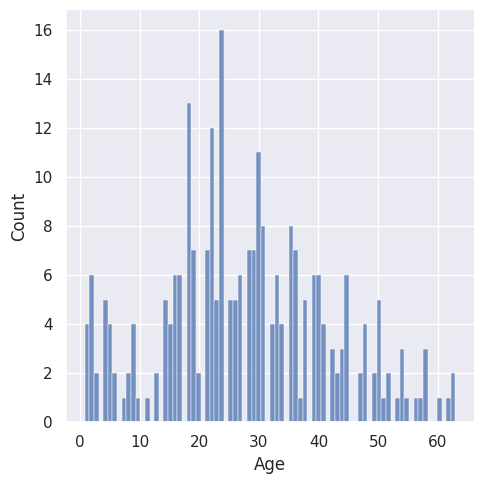

In [24]:
import seaborn as sns

sns.displot((train_df.loc[train_df["Sex"] == "female"]).Age, bins=80)

<Axes: xlabel='Age', ylabel='Count'>

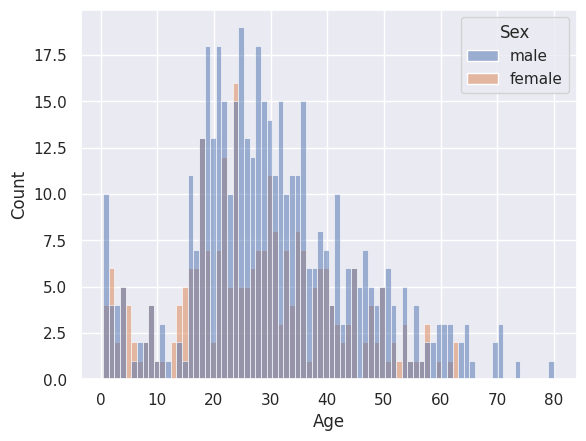

In [29]:

sns.histplot(data=train_df, x="Age", hue="Sex", bins=80)

<Axes: xlabel='Age', ylabel='Density'>

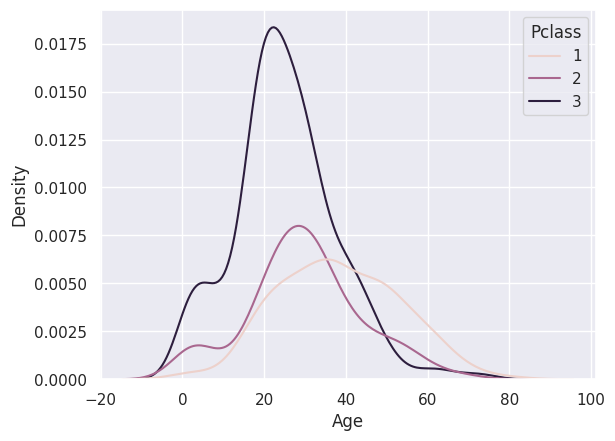

In [32]:
sns.kdeplot(data=train_df, x="Age", hue="Pclass")

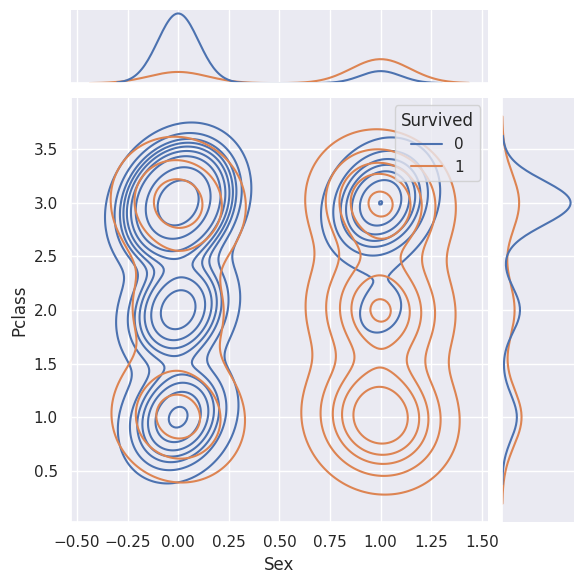

In [39]:
sns.jointplot(data = train_df, x=train_df["Sex"] == "female", y="Pclass", hue="Survived", kind="kde")